In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [12]:
df = df.rename(columns={'CustomerID': "id", 'Gender': "gender", 'Age': "age", 'Annual Income (k$)': "annual_income",
       'Spending Score (1-100)': "spending_score"})

In [13]:
df.head()

,id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [15]:
df.describe()

,id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


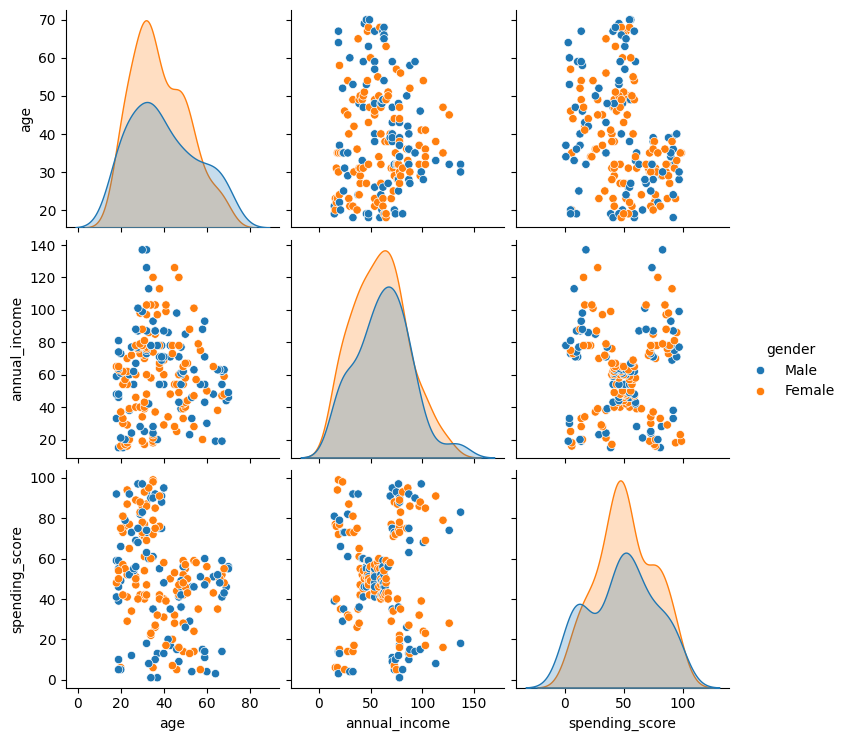

In [23]:
df = df.drop("id", axis=1)
sns.pairplot(data=df, hue='gender')

In [24]:
df.groupby("gender").mean()

,age,annual_income,spending_score
gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

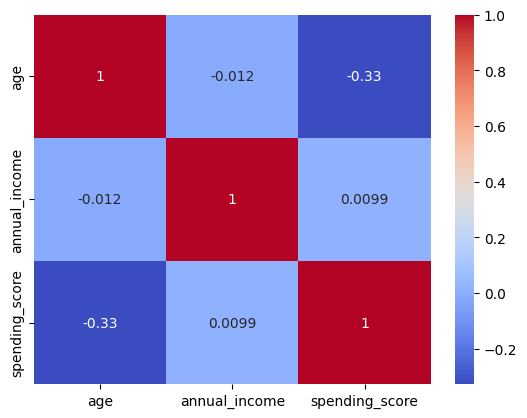

In [30]:
sns.heatmap(df.drop("gender", axis=1).corr(), annot=True, cmap='coolwarm')

In [31]:
from sklearn.cluster import KMeans

In [32]:
clustering1 = KMeans()

In [34]:
clustering1.fit(df[["annual_income"]])

KMeans()

In [35]:
df["income_cluster"] = clustering1.labels_

In [43]:
df.income_cluster.value_counts().sort_index()

income_cluster
0    36
1    26
2    14
3    42
4    36
5     6
6    16
7    24
Name: count, dtype: int64

In [44]:
clustering1.inertia_

2857.441697191697

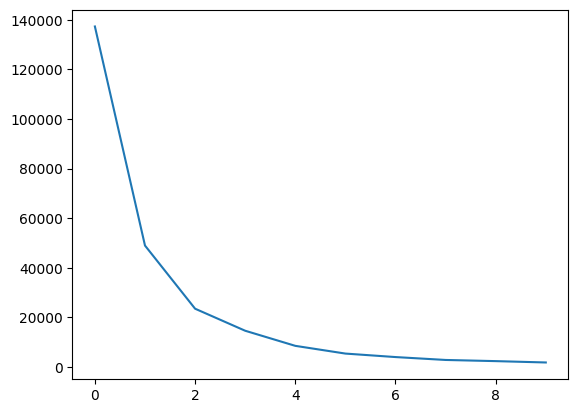

In [48]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["annual_income"]])
    inertia_score.append(kmeans.inertia_)

plt.plot(inertia_score)

In [49]:
clustering1 = KMeans(n_clusters=3)

In [50]:
clustering1.fit(df[["annual_income"]])

KMeans(n_clusters=3)

In [51]:
df['income_cluster'] = clustering1.labels_

In [55]:
df.groupby('income_cluster')[["annual_income", "age", "spending_score"]].mean()

,annual_income,age,spending_score
income_cluster,,,
0,33.486486,39.500000,50.229730
1,69.750000,38.663462,49.798077
2,108.181818,37.545455,52.000000


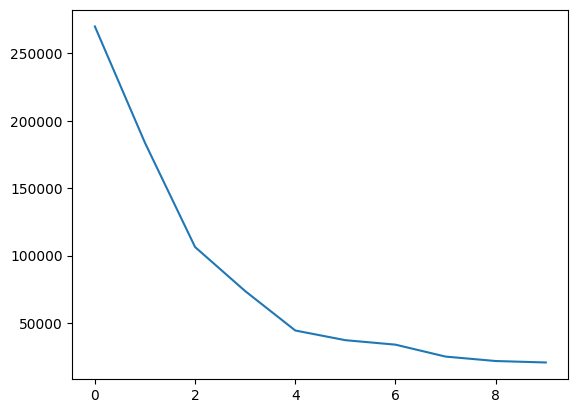

In [57]:
inertia_score2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[["annual_income", "spending_score"]])
    inertia_score2.append(kmeans2.inertia_)

plt.plot(inertia_score2)

In [58]:
clustering2 = KMeans(n_clusters=5)

In [60]:
clustering2.fit(df[['annual_income', 'spending_score']])

KMeans(n_clusters=5)

In [ ]:
df['income_and_spending_cluster'] = clustering2.labels_

In [ ]:
df.groupby('income_and_spending_cluster')[["annual_income", "age", "spending_score"]].mean()

In [69]:
center = pd.DataFrame(clustering2.cluster_centers_, columns=['x', 'y'])

<Axes: xlabel='x', ylabel='y'>

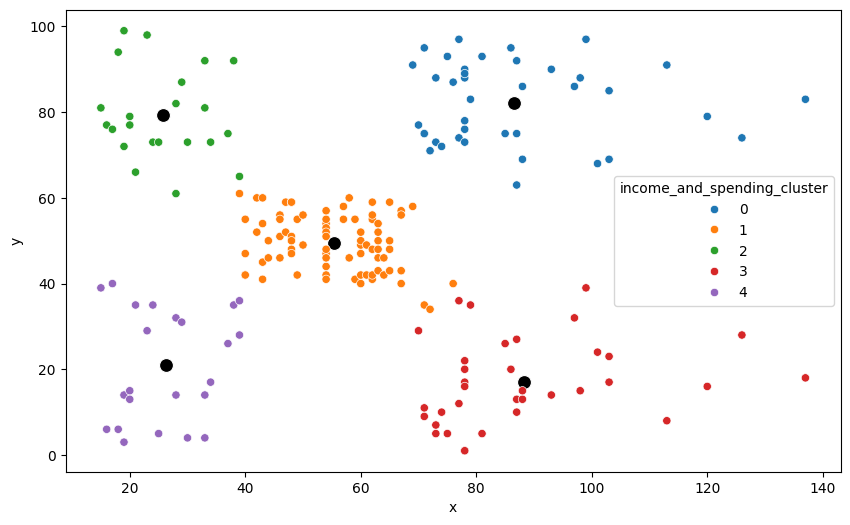

In [72]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=center, x='x', y='y', markers='*', c='black', s=100)
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='income_and_spending_cluster', palette='tab10')

In [73]:
dff = pd.read_csv('Mall_Customers.csv')

In [74]:
dff = pd.get_dummies(df, drop_first=True)

In [75]:
dff.head()

,age,annual_income,spending_score,income_cluster,income_and_spending_cluster,gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,2,True
2,20,16,6,0,4,False
3,23,16,77,0,2,False
4,31,17,40,0,4,False


In [76]:
dff = dff.drop(['income_cluster', 'income_and_spending_cluster'], axis=1)

In [79]:
dff.head()

,age,annual_income,spending_score,gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
dff = pd.DataFrame(scaler.fit_transform(dff))

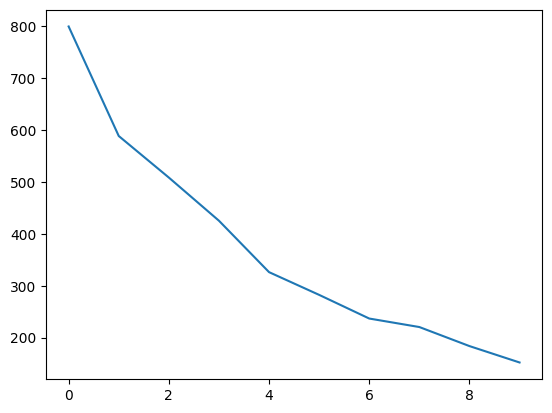

In [84]:
inertia_score3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)

plt.plot(inertia_score3)

In [85]:
clustering3 = KMeans(n_clusters=4)

clustering3.fit(dff)

KMeans(n_clusters=4)

In [86]:
dff['cluster'] = clustering3.labels_    

In [89]:
dff.head()

,0,1,2,3,cluster
0,-1.424569,-1.738999,-0.434801,1.128152,1
1,-1.281035,-1.738999,1.195704,1.128152,1
2,-1.352802,-1.700830,-1.715913,-0.886405,0
3,-1.137502,-1.700830,1.040418,-0.886405,2
4,-0.563369,-1.662660,-0.395980,-0.886405,0
